In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import pprint
import csv
import random
import seaborn as sns
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from sklearn.linear_model import LinearRegression

In [2]:
#open files
fire_year = "../output_data/fire_sum_year.csv"
defo_year = "../output_data/defo_sum_year.csv"

fire_year_sum_df = pd.read_csv(fire_year)
defo_year_sum_df = pd.read_csv(defo_year)

In [3]:
#merge Dataframes
merded_year_fire_defo = pd.merge(fire_year_sum_df, defo_year_sum_df, on=['year'])
merded_year_fire_defo

,year,Number of Fires,square km
0,1998,123881,17383.0
1,1999,132526,17259.0
2,2000,97541,18226.0
3,2001,137926,18165.0
4,2002,220015,21650.0
5,2003,208476,25396.0
6,2004,248928,27772.0
7,2005,224294,19014.0
8,2006,123327,14286.0
9,2007,206412,11651.0


In [4]:
# axis and ticks
x_axis_fire_defo = list(merded_year_fire_defo.year)
tick_locations = [value for value in x_axis_fire_defo]

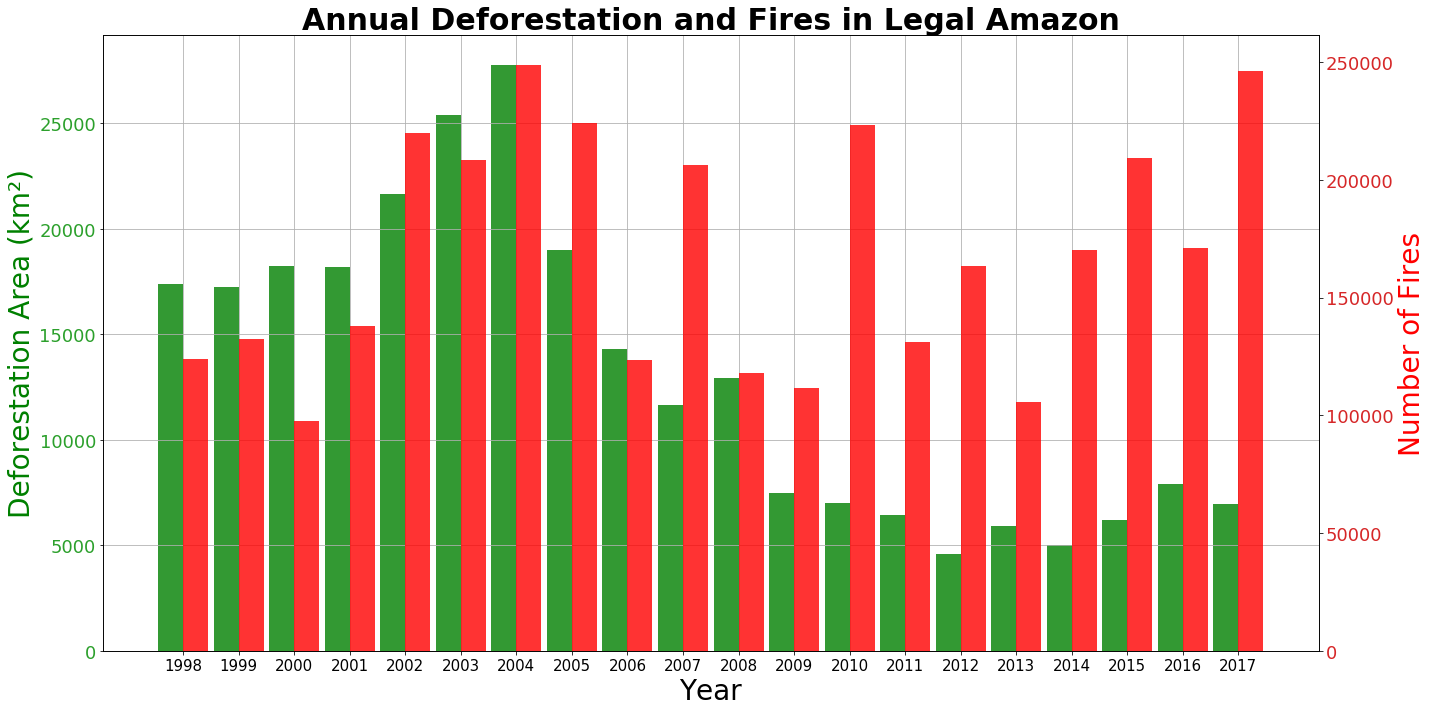

In [16]:
# Create 2 bar graph in the same fig for Annual Deforestation and rain in Legal Amazon.
fig, ax1 = plt.subplots(figsize=(20, 10))

# Deforestation
for index, row in merded_year_fire_defo.iterrows():
    def_graph = ax1.bar(merded_year_fire_defo["year"][index], merded_year_fire_defo["square km"][index],  color='g', alpha=.8,\
                        align="edge",width=-0.45)
ax1.set_title("Annual Deforestation and Fires in Legal Amazon", fontweight = "bold", fontsize = 30)
ax1.set_xlabel("Year",fontsize = 28)
ax1.set_ylabel("Deforestation Area (km²)",fontsize = 28, color ='g')
ax1.tick_params(axis='y',labelcolor='tab:green', labelsize = 18)

# Fire
ax2 = ax1.twinx()
for index, row in merded_year_fire_defo.iterrows():
    rain_graph = ax2.bar(merded_year_fire_defo["year"][index], merded_year_fire_defo["Number of Fires"][index],  color='r', alpha=.8,\
                         align="edge", width=0.45)
ax2.set_ylabel("Number of Fires",fontsize = 28, color ='r')
ax2.tick_params(axis='y',labelcolor='tab:red', labelsize = 18)

#other configurations
plt.xticks(tick_locations, x_axis_fire_defo, rotation=90)
ax1.tick_params(axis='x',labelsize = 15)
plt.tight_layout()
ax1.grid()

#save figure
plt.savefig("../output_data/images/defo_fire_year.png", dpi=fig.dpi)
plt.show()

In [6]:
#open files
fire_state = "../output_data/fire_mean_state.csv"
defo_state = "../output_data/defo_mean_state.csv"

fire_mean_df = pd.read_csv(fire_state)
defo_mean_df = pd.read_csv(defo_state)

In [7]:
fire_mean_df

,Unnamed: 0,State,Number of Fires
0,0,AC,285.962343
1,1,AM,491.493724
2,2,AP,105.087866
3,3,MA,1570.205021
4,4,MT,2738.870293
5,5,PA,2417.744770
6,6,RO,775.677824
7,7,RR,123.238494
8,8,TO,888.836820


In [8]:
defo_mean_df

,state,square km
0,AC,424.70
1,AM,751.90
2,AP,32.30
3,MA,709.65
4,MT,4284.40
5,PA,4683.75
6,RO,1797.55
7,RR,232.15
8,TO,139.40


In [9]:
new_defo_mean = defo_mean_df.rename(columns={"state": "State", "square km": "Square km"})
new_defo_mean

,State,Square km
0,AC,424.70
1,AM,751.90
2,AP,32.30
3,MA,709.65
4,MT,4284.40
5,PA,4683.75
6,RO,1797.55
7,RR,232.15
8,TO,139.40


In [10]:
state_merged_mean = new_defo_mean.merge(fire_mean_df, on='State')
state_merged_mean.to_csv("../output_data/merged_fire_defo_mean.csv")
state_merged_mean


,State,Square km,Unnamed: 0,Number of Fires
0,AC,424.70,0,285.962343
1,AM,751.90,1,491.493724
2,AP,32.30,2,105.087866
3,MA,709.65,3,1570.205021
4,MT,4284.40,4,2738.870293
5,PA,4683.75,5,2417.744770
6,RO,1797.55,6,775.677824
7,RR,232.15,7,123.238494
8,TO,139.40,8,888.836820


In [11]:
# axis
xaxis = list(new_defo_mean.State)
xaxis

['AC', 'AM', 'AP', 'MA', 'MT', 'PA', 'RO', 'RR', 'TO']

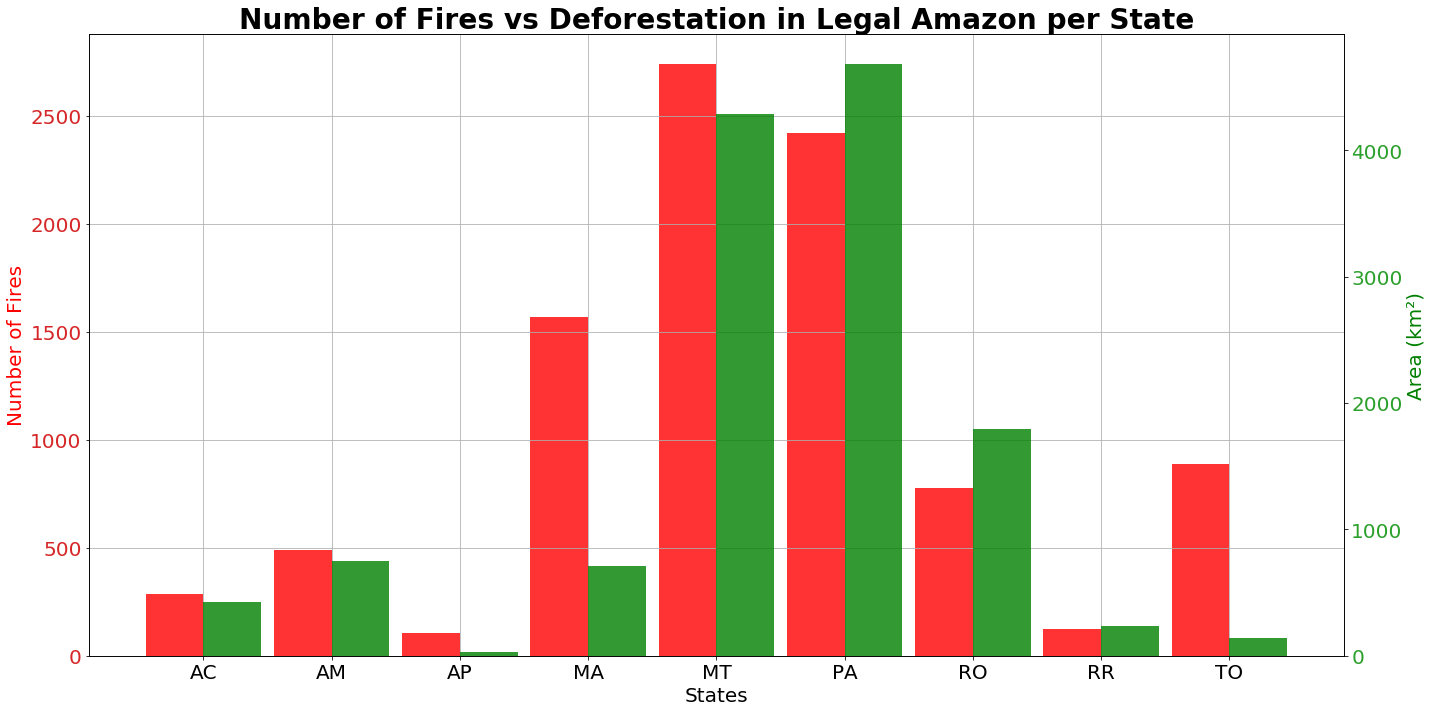

In [17]:
# Create 2 bar graph in the same fig for Deforestation and Fires by state in Legal Amazon.
fig, ax1 = plt.subplots(figsize=(20, 10))
# Deforestation
for index, row in state_merged_mean.iterrows():
    def_graph = ax1.bar(state_merged_mean["State"][index], state_merged_mean["Number of Fires"][index],color='red', alpha=.8,\
                        align="edge",width=-0.45)
ax1.set_title("Number of Fires vs Deforestation in Legal Amazon per State", fontweight = "bold", fontsize = 28)
ax1.set_xlabel("States",fontsize = 20)
ax1.set_ylabel("Number of Fires",fontsize = 20, color ='r')
ax1.tick_params(axis='y',labelcolor='tab:red', labelsize = 20)
# Rain
ax2 = ax1.twinx()
for index, row in state_merged_mean.iterrows():
    rain_graph = ax2.bar(state_merged_mean["State"][index], state_merged_mean["Square km"][index],color='green', alpha=.8,\
                        align="edge",width=+0.45)
ax2.set_ylabel("Area (km²)",fontsize = 20, color ='g')
ax2.tick_params(axis='y',labelcolor='tab:green', labelsize = 20)
#other configurations
plt.xticks(xaxis, rotation=90)
ax1.tick_params(axis='x',labelsize = 20)
plt.tight_layout()
ax1.grid()
#save figure
plt.savefig("../output_data/images/fire_defo_state.png", dpi=fig.dpi)
plt.show()

In [13]:
state_merged_mean

,State,Square km,Unnamed: 0,Number of Fires
0,AC,424.70,0,285.962343
1,AM,751.90,1,491.493724
2,AP,32.30,2,105.087866
3,MA,709.65,3,1570.205021
4,MT,4284.40,4,2738.870293
5,PA,4683.75,5,2417.744770
6,RO,1797.55,6,775.677824
7,RR,232.15,7,123.238494
8,TO,139.40,8,888.836820


In [14]:
#linear regression
X = state_merged_mean['Number of Fires'].values.reshape(-1, 1) 
Y = state_merged_mean['Square km'].values.reshape(-1, 1)
linear_regressor = LinearRegression() 
# perform linear regression
linear_regressor.fit(X, Y)  
# make predictions
Y_pred = linear_regressor.predict(X)  


# correlation matrices 
#correlation coefficient 

[[1.6251916]]
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.873
Model:                            OLS   Adj. R-squared (uncentered):              0.857
Method:                 Least Squares   F-statistic:                              54.93
Date:                Mon, 25 May 2020   Prob (F-statistic):                    7.54e-05
Time:                        15:01:21   Log-Likelihood:                         -68.665
No. Observations:                   9   AIC:                                      139.3
Df Residuals:                       8   BIC:                                      139.5
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------

C:\Users\joaog\Anaconda3\lib\site-packages\scipy\stats\stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  "anyway, n=%i" % int(n))


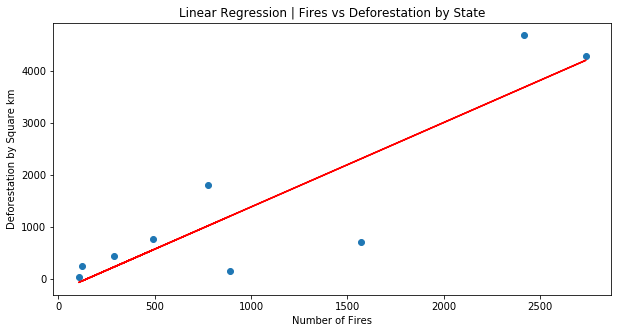

In [19]:
fig, ax = plt.subplots(figsize=(10, 5))

#linear regression
X = state_merged_mean['Number of Fires'].values.reshape(-1, 1) 
Y = state_merged_mean['Square km'].values.reshape(-1, 1)
linear_regressor = LinearRegression()
# perform linear regression
linear_regressor.fit(X, Y)
# make predictions
Y_pred = linear_regressor.predict(X)
# correlation matrices
#correlation coefficient

plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
#plt.set_xlabel("mm",fontsize = 18, color ='b')


print(linear_regressor.coef_)
# Correlation Coefficient
# and R-square
state_merged_mean.corr(method ='pearson')
model1=sm.OLS(X,Y)
result=model1.fit()
print(result.summary())

plt.title("Linear Regression | Fires vs Deforestation by State")
plt.xlabel("Number of Fires")
plt.ylabel("Deforestation by Square km")
plt.savefig("../output_data/images/lr_fire_defo_state.png")
plt.show()

